In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import mglearn

In [2]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')
# sample_submission = pd.read_csv('sampleSubmission.csv')

## TEXT FEATURES

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
y_train=train_data["label"]
X_test = test_data["original_text"]
X_train=train_data["original_text"]
y_test=test_data["label"]
vectorizer= TfidfVectorizer(min_df=3,max_features=None, strip_accents='unicode', analyzer='word',ngram_range=(1, 3),stop_words = 'english')
vectorizer.fit(X_train)
X_train =  vectorizer.transform(X_train)
X_test = vectorizer.transform(test_data["original_text"])

In [4]:
X_test_copy=X_test.copy()
X_train_copy=X_train.copy()

### Reducing the number of features of text using SVD

In [5]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, n_iter=5, random_state=1)
svd.fit(X_train)
X_train_text_reduced=svd.transform(X_train)
X_test_text_reduced=svd.transform(X_test)

In [6]:
X_train_reduced_df = pd.DataFrame(X_train_text_reduced)
X_test_reduced_df=pd.DataFrame(X_test_text_reduced)

## PCA on Numerical features

In [18]:
aoa_aggregated_train=pd.read_csv("AoA_countfeatures_traindata.csv").fillna(0)
aoa_aggregated_test=pd.read_csv("AoA_countfeatures_testdata.csv").fillna(0)
print(aoa_aggregated_train.shape)
print(aoa_aggregated_test.shape,"\n---------------\n")


aoa_numerical_train=pd.read_csv("aoa_features_traindata.csv").fillna(0)
aoa_numerical_test=pd.read_csv("aoa_features_testdata.csv").fillna(0)
print(aoa_numerical_train.shape)
print(aoa_numerical_test.shape,"\n---------------\n")



numerical_train=pd.read_csv("only_numeric_features_traindata.csv").fillna(0)
numerical_test=pd.read_csv("only_numeric_features_testdata.csv").fillna(0)
print(numerical_train.shape)
print(numerical_test.shape,"\n---------------\n")

pos_tag_train=pd.read_csv("pos_tag_traindata.csv").fillna(0)
pos_tag_test=pd.read_csv("pos_tag_testdata.csv").fillna(0)
print(pos_tag_train.shape)
print(pos_tag_test.shape,"\n---------------\n")

concreteness_aggregated_train=pd.read_csv("concreteness_features_traindata.csv").fillna(0)
concreteness_aggregated_test=pd.read_csv("concreteness_features_testdata.csv").fillna(0)
print(concreteness_aggregated_train.shape)
print(concreteness_aggregated_test.shape,"\n---------------\n")

concreteness_numerical_train=pd.read_csv("concreteness_numerical_features_traindata.csv").fillna(0)
concreteness_numerical_test=pd.read_csv("concreteness_numerical_features_testdata.csv").fillna(0)
print(concreteness_numerical_train.shape)
print(concreteness_numerical_test.shape,"\n---------------\n")


readability_train=pd.read_csv("readability_scores_included_train.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text'],axis=1)
readability_test=pd.read_csv("readability_scores_included_test.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text',"id"],axis=1)
print(readability_train.columns)


X_train_numerical = pd.concat([aoa_aggregated_train,aoa_numerical_train,numerical_train,pos_tag_train,concreteness_aggregated_train,concreteness_numerical_train,readability_train], axis=1).fillna(0)

X_test_numerical = pd.concat([aoa_aggregated_test,aoa_numerical_test,numerical_test,pos_tag_test,concreteness_aggregated_test,concreteness_numerical_test,readability_test], axis=1).fillna(0)

print(X_train_numerical.shape)

print(X_test_numerical.shape)

X_train_numerical=X_train_numerical.drop(["Unnamed: 0"],axis=1)
X_test_numerical=X_test_numerical.drop(["Unnamed: 0"],axis=1)
train_x_numerical=X_train_numerical.copy()
test_x_numerical=X_test_numerical.copy()

train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

(416768, 11)
(119092, 11) 
---------------

(416768, 12)
(119092, 12) 
---------------

(416768, 11)
(119092, 11) 
---------------

(416768, 40)
(119092, 40) 
---------------

(416768, 8)
(119092, 8) 
---------------

(416768, 13)
(119092, 13) 
---------------

Index(['dale_chall_score', 'flesch reading ease score', 'gunning fog',
       'flesch kincaid grade level', 'coleman liau index', 'smog index',
       'automated readability index', 'linsear write formula'],
      dtype='object')
(416768, 103)
(119092, 103)


In [19]:
y_train = pd.read_csv('WikiLarge_Train.csv')["label"]
y_test= pd.read_csv('WikiLarge_Test.csv')["label"]

In [20]:
# Create correlation matrix
corr_matrix = X_train_numerical.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_numerical=X_train_numerical.drop(X_train_numerical[to_drop], axis=1)
X_test_numerical=X_test_numerical.drop(X_test_numerical[to_drop],axis=1)
train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

In [21]:
scaler = StandardScaler()
# transform data
X_train_numerical = scaler.fit_transform(X_train_numerical)
# X_test=scaler.transform(X_test)
X_test_numerical = scaler.transform(X_test_numerical)

## PCA on Numerical features

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train_numerical)

array([[ 5.99506381e+00, -1.46410084e+00,  1.01133292e+00, ...,
        -2.02602924e-17,  2.11727316e-16,  2.87479203e-17],
       [ 2.07620839e+00,  2.34408623e+00,  1.12667902e+00, ...,
         3.03444197e-16, -4.67089244e-16,  5.92183602e-17],
       [ 8.92348297e+00, -3.50695653e+00,  1.55561599e+00, ...,
         3.49673396e-17, -9.55560358e-17,  1.88466044e-16],
       ...,
       [-2.37158052e+00,  9.83696326e-01, -1.13559341e+00, ...,
         1.83233670e-19, -1.42706363e-18, -2.54395995e-20],
       [ 6.70965951e+00, -4.11524820e+00, -1.17614910e-01, ...,
        -8.72923957e-19,  6.96072537e-18, -2.94100178e-20],
       [-7.27817689e+00, -1.84545845e+00,  1.40038219e+01, ...,
         9.84105612e-19, -2.62347022e-18,  6.88545260e-19]])

In [23]:
explained_variance=pca.explained_variance_ratio_.tolist()
explained_variance=list(explained_variance)


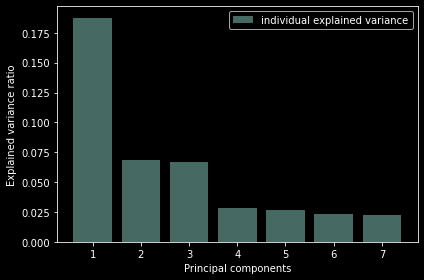

In [24]:
a=list([1,2,3,4,5,6,7])
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(a, explained_variance[:7], alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [25]:
pca=PCA(n_components=4)
X_train_numerical_transformed=pca.fit_transform(X_train_numerical)
X_test_numerical_transformed=pca.transform(X_test_numerical)

## Baseline models for text+numerical features

In [26]:
X_train = pd.concat([pd.DataFrame(X_train_numerical_transformed),pd.DataFrame(X_train_text_reduced)], axis=1).fillna(0)

X_test = pd.concat([pd.DataFrame(X_test_numerical_transformed),pd.DataFrame(X_test_text_reduced)], axis=1).fillna(0)

In [27]:
X_train.shape

(416768, 204)

# Dummy classifier 

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   3.3s
[CV] END .............................strategy=most_frequent; total time=   0.3s
[CV] END .............................strategy=most_frequent; total time=   0.3s
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.3s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ...................................strategy=uniform; total time=   0.2s
[CV] END ...

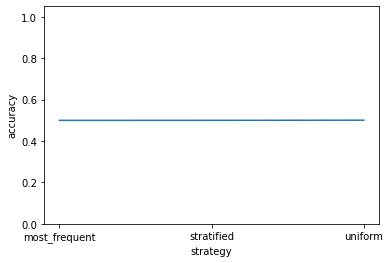

0.500 for {'strategy': 'most_frequent'}
0.500 for {'strategy': 'stratified'}
0.501 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best accuracy


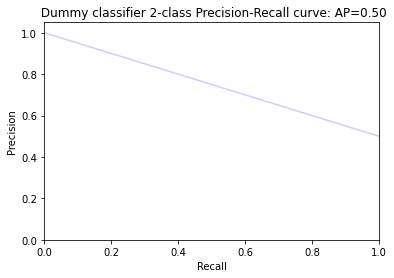

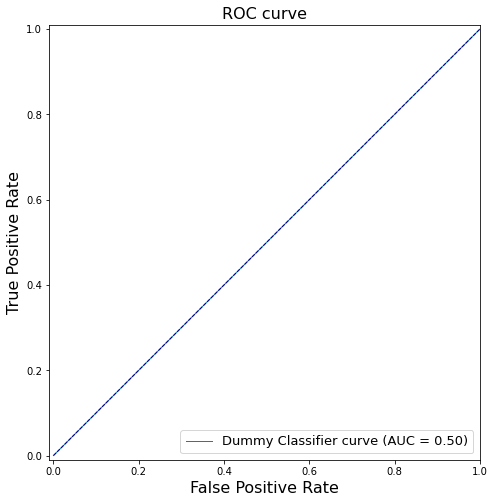

In [28]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   0.7s
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END .............................strategy=most_frequent; total time=   0.3s
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ................................strategy=stratified; total time=   0.2s
[CV] END ...................................strategy=uniform; total time=   0.2s
[CV] END .....

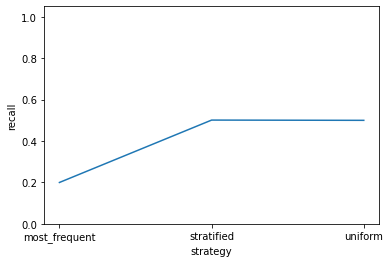

0.200 for {'strategy': 'most_frequent'}
0.501 for {'strategy': 'stratified'}
0.500 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best recall


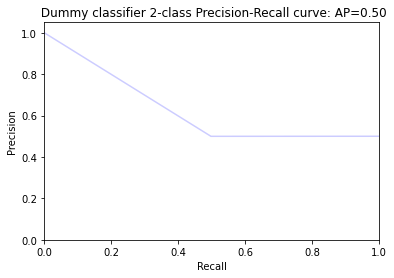

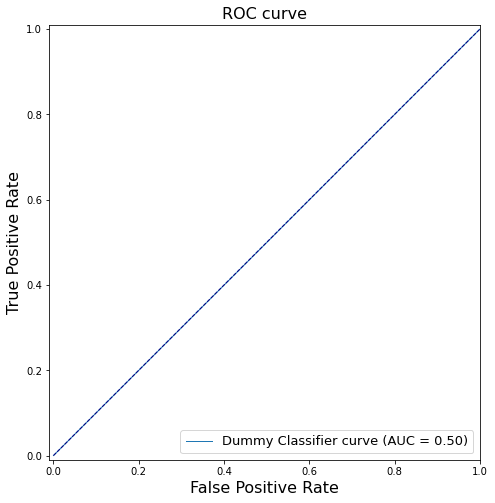

In [29]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# Logistic regression

Tuning hyper-parameters for recall
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   3.3s
[CV] END ............................................C=0.001; total time=   2.4s
[CV] END ............................................C=0.001; total time=   2.5s
[CV] END ............................................C=0.001; total time=   2.4s
[CV] END ............................................C=0.001; total time=   2.6s
[CV] END .............................................C=0.01; total time=   4.8s
[CV] END .............................................C=0.01; total time=   2.9s
[CV] END .............................................C=0.01; total time=   2.6s
[CV] END .............................................C=0.01; total time=   3.2s
[CV] END .............................................C=0.01; total time=   4.1s
[CV] END ..............................................C=0.1; total time=   5.5s
[CV] END .....

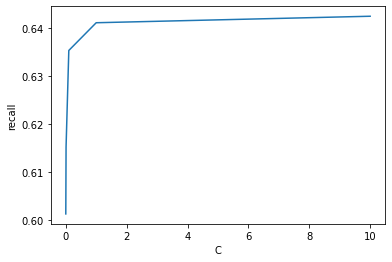

0.601 for {'C': 0.001}
0.615 for {'C': 0.01}
0.635 for {'C': 0.1}
0.641 for {'C': 1}
0.643 for {'C': 10}

 For the model with the best recall


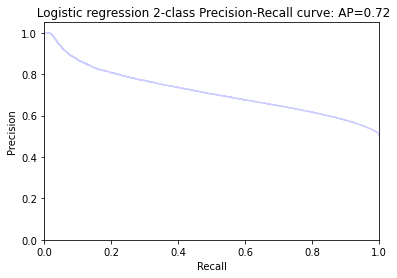

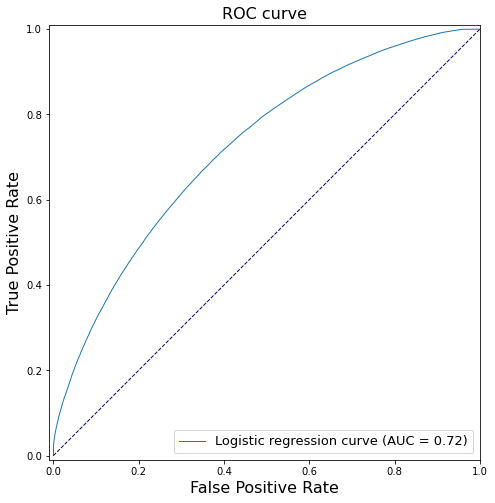

In [31]:
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
#mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,train_columns, n_top_features=30)
# predictions=log_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END ............................................C=0.001; total time=   1.4s
[CV] END ............................................C=0.001; total time=   1.4s
[CV] END ............................................C=0.001; total time=   2.2s
[CV] END ............................................C=0.001; total time=   2.4s
[CV] END .............................................C=0.01; total time=   4.6s
[CV] END .............................................C=0.01; total time=   3.5s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END .............................................C=0.01; total time=   3.0s
[CV] END .............................................C=0.01; total time=   2.8s
[CV] END ..............................................C=0.1; total time=   4.6s
[CV] END ...

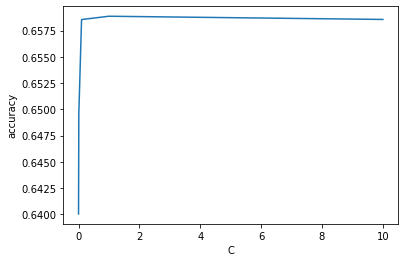

0.640 for {'C': 0.001}
0.650 for {'C': 0.01}
0.659 for {'C': 0.1}
0.659 for {'C': 1}
0.659 for {'C': 10}

 For the model with the best accuracy


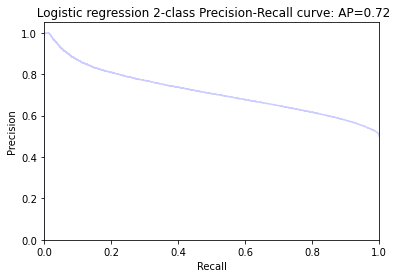

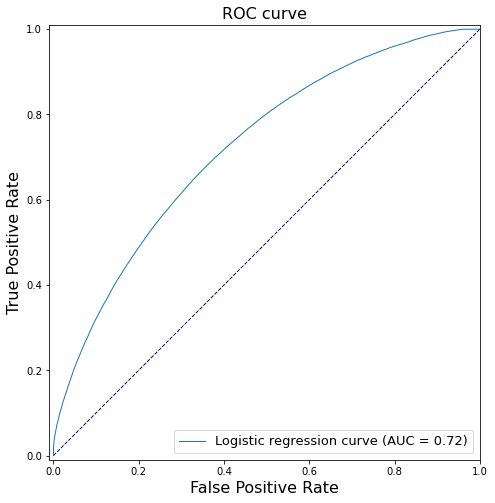

In [32]:
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
#mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,train_columns, n_top_features=30)
# predictions=log_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

# Random forest classifier

Tuning hyper-parameters for recall
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.4s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.4s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=  12.6s
[CV] END ..m

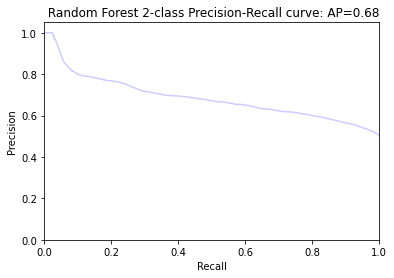

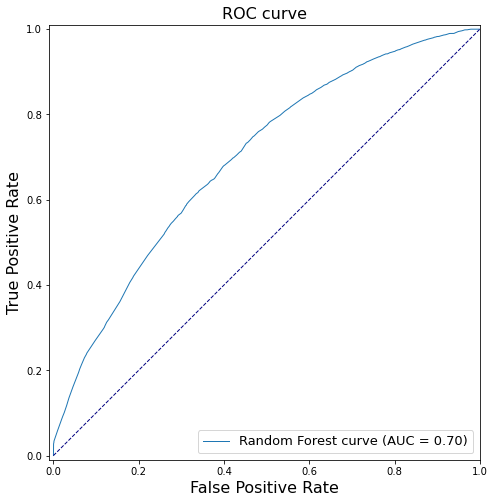

In [33]:
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)
#pd.Series(rf_grid.best_estimator_.feature_importances_, index=train_columns).nlargest(20).plot(kind='barh')



Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.8s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   3.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.9s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.7s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   6.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=  12.8s
[CV] END .

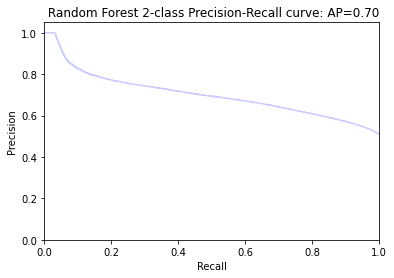

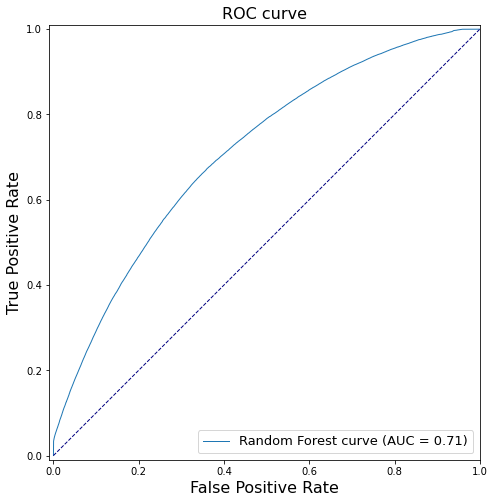

In [34]:
score ='accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")

#pd.Series(rf_grid.best_estimator_.feature_importances_, index=train_columns).nlargest(20).plot(kind='barh')
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   6.9s
[CV 2/5] END ........................................C=0.001; total time=  10.3s
[CV 3/5] END ........................................C=0.001; total time=   8.6s
[CV 4/5] END ........................................C=0.001; total time=   8.5s
[CV 5/5] END ........................................C=0.001; total time=   8.4s
[CV 1/5] END .........................................C=0.01; total time=   9.5s
[CV 2/5] END .........................................C=0.01; total time=  13.4s
[CV 3/5] END .........................................C=0.01; total time=  13.5s
[CV 4/5] END .........................................C=0.01; total time=  12.8s
[CV 5/5] END .........................................C=0.01; total time=  11.3s
[CV 1/5] END ..........................................C=0.1; total time=  15.7s
[CV 2/5] END

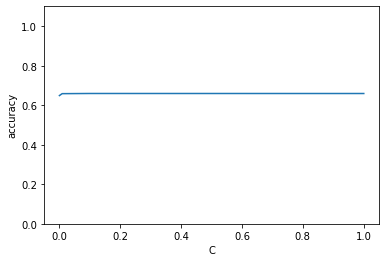

0.649 for {'C': 0.001}
0.658 for {'C': 0.01}
0.659 for {'C': 0.1}
0.659 for {'C': 1}

 For the model with the best accuracy


In [37]:
from sklearn.svm import SVC,LinearSVC
score = "accuracy"

print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
#mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,train_columns, n_top_features=40)

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   8.4s
[CV 2/5] END ........................................C=0.001; total time=   8.8s
[CV 3/5] END ........................................C=0.001; total time=   7.9s
[CV 4/5] END ........................................C=0.001; total time=   7.4s
[CV 5/5] END ........................................C=0.001; total time=   9.1s
[CV 1/5] END .........................................C=0.01; total time=   9.1s
[CV 2/5] END .........................................C=0.01; total time=  12.1s
[CV 3/5] END .........................................C=0.01; total time=  11.9s
[CV 4/5] END .........................................C=0.01; total time=  13.7s
[CV 5/5] END .........................................C=0.01; total time=  12.7s
[CV 1/5] END ..........................................C=0.1; total time=  15.9s
[CV 2/5] END .

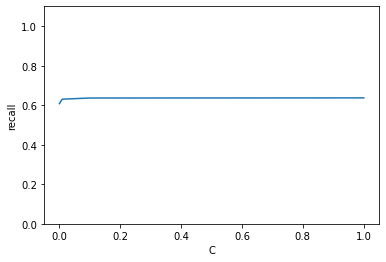

0.608 for {'C': 0.001}
0.630 for {'C': 0.01}
0.636 for {'C': 0.1}
0.637 for {'C': 1}

 For the model with the best recall


In [36]:
from sklearn.svm import SVC,LinearSVC
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
#mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,train_columns, n_top_features=40)